In [3]:
import pandas as pd
import numpy as np


# Predicting Credit Card Fraud
 


In [4]:
# Get mem altered data
df = pd.read_pickle('../../Data/creditcard.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null uint32
V1        284807 non-null float32
V2        284807 non-null float32
V3        284807 non-null float32
V4        284807 non-null float32
V5        284807 non-null float32
V6        284807 non-null float32
V7        284807 non-null float32
V8        284807 non-null float32
V9        284807 non-null float32
V10       284807 non-null float32
V11       284807 non-null float32
V12       284807 non-null float32
V13       284807 non-null float32
V14       284807 non-null float32
V15       284807 non-null float32
V16       284807 non-null float32
V17       284807 non-null float32
V18       284807 non-null float32
V19       284807 non-null float32
V20       284807 non-null float32
V21       284807 non-null float32
V22       284807 non-null float32
V23       284807 non-null float32
V24       284807 non-null float32
V25       284807 non-null float32
V26   

## Upsampling
#### Using SMOTE to create new fraud data!

In [6]:
# First we will take out data that will be used for testing!
# Equal amount of fraud and non fraud cases

#Get number of fraud cases and their indices
num_fraud = len(df[df.Class == 1])
fraud_index = np.array(df[df.Class==1].index)

# Get 1/4 of frauds for dedicated test data!
rand_fraud_ind = np.random.choice(fraud_index, int(num_fraud/4), replace = False)

#Get all normal indices
normal_index = df[df.Class==0].index

#Select number of normal indices that are equal to 1/4 number of fraud cases 
rand_norm_ind = np.random.choice(normal_index, int(num_fraud/4), replace = False)
rand_norm_ind = np.array(rand_norm_ind)

#Create test dataframe
test_ind = np.concatenate([rand_fraud_ind,rand_norm_ind])
test_df = df.iloc[test_ind, :]


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 64329 to 21336
Data columns (total 31 columns):
Time      246 non-null uint32
V1        246 non-null float32
V2        246 non-null float32
V3        246 non-null float32
V4        246 non-null float32
V5        246 non-null float32
V6        246 non-null float32
V7        246 non-null float32
V8        246 non-null float32
V9        246 non-null float32
V10       246 non-null float32
V11       246 non-null float32
V12       246 non-null float32
V13       246 non-null float32
V14       246 non-null float32
V15       246 non-null float32
V16       246 non-null float32
V17       246 non-null float32
V18       246 non-null float32
V19       246 non-null float32
V20       246 non-null float32
V21       246 non-null float32
V22       246 non-null float32
V23       246 non-null float32
V24       246 non-null float32
V25       246 non-null float32
V26       246 non-null float32
V27       246 non-null float32
V28       246 non-null

In [8]:
test_df.to_pickle('../../Data/dedicatedTest.pkl')

In [9]:
# Make training dataset
train_df = df.drop(test_df.index)

In [10]:
# Split the training and test data first!
X, y = train_df.drop('Class',1), train_df['Class']

# Import SMOTE which is a upsampling function
from imblearn.over_sampling import SMOTE

# Create new fake fraud data
smote = SMOTE(random_state=11, ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)


# Get test data
X_test, y_test = test_df.drop('Class',1), test_df['Class']

In [11]:
# This is to retain feature names
# Make a new DataFrame with the training data (X and Y)
# Starts with putting it into an array
i = 0
arr = []
for elem in X_sm:
    arr.append(np.concatenate((elem, y_sm[i]), axis=None))
    i+=1

In [12]:
#Put it into a DataFrame
train_df = pd.DataFrame(columns=df.columns, data=arr)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568384 entries, 0 to 568383
Data columns (total 31 columns):
Time      568384 non-null float64
V1        568384 non-null float64
V2        568384 non-null float64
V3        568384 non-null float64
V4        568384 non-null float64
V5        568384 non-null float64
V6        568384 non-null float64
V7        568384 non-null float64
V8        568384 non-null float64
V9        568384 non-null float64
V10       568384 non-null float64
V11       568384 non-null float64
V12       568384 non-null float64
V13       568384 non-null float64
V14       568384 non-null float64
V15       568384 non-null float64
V16       568384 non-null float64
V17       568384 non-null float64
V18       568384 non-null float64
V19       568384 non-null float64
V20       568384 non-null float64
V21       568384 non-null float64
V22       568384 non-null float64
V23       568384 non-null float64
V24       568384 non-null float64
V25       568384 non-null float64
V26  

In [20]:
568384/2

284192.0

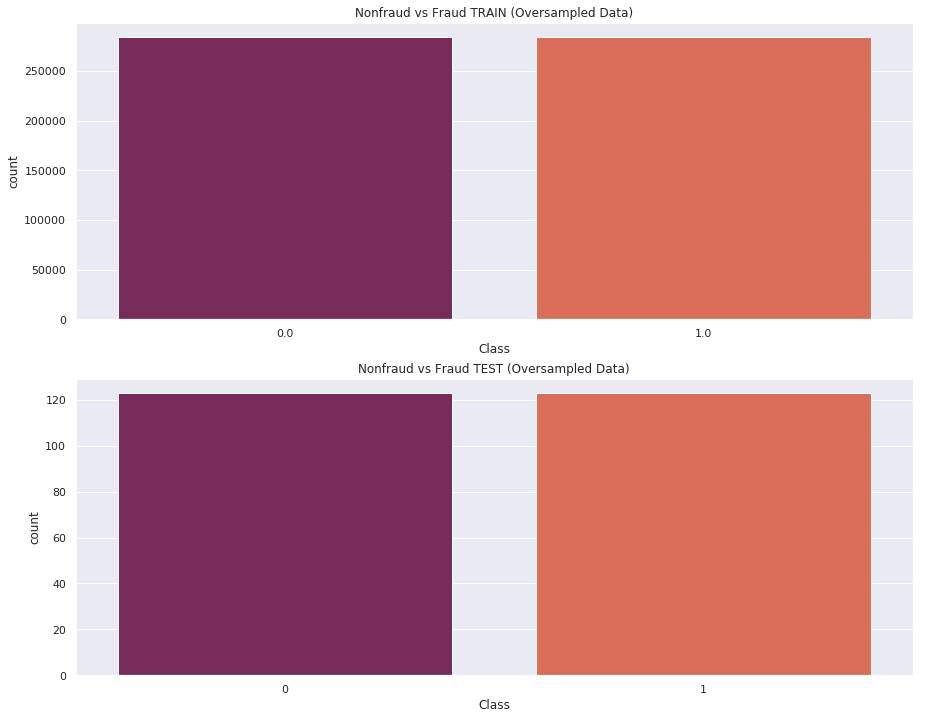

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


# Look at oversampled data

f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="darkgrid")
plt.subplot(2,1,1)
plt.title('Nonfraud vs Fraud TRAIN (Oversampled Data)')
ax = sns.countplot(x="Class", data=train_df, palette='rocket')

plt.subplot(2,1,2)
plt.title('Nonfraud vs Fraud TEST (Oversampled Data)')
f = sns.countplot(x="Class", data=test_df, palette='rocket')


In [15]:
X_train, y_train = train_df.drop('Class',1), train_df['Class']

In [16]:
import xgboost as xgb

# Check it on an XGBClassifier
xg_cls = xgb.XGBClassifier(tree_method='gpu_exact', random_state=3)
xg_cls.fit(X_train, y_train)

preds = xg_cls.predict(X_test)
train_preds = xg_cls.predict(X_train)

In [17]:
# Accuracy tables on the training and test set

table_train = pd.crosstab(y_train, train_preds, margins=True)
table_test = pd.crosstab(y_test, preds, margins=True)
test_score = xg_cls.score(X_test, y_test) 
train_score = xg_cls.score(X_train, y_train) 

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '***********************************\n'
    '********** Over Sampled ***********\n'
    '***********************************\n\n'    
    'Training set accuracy:\n'
    'Percent Type I errors:  {:.8f}\n'
    'Percent Type II errors: {:.8f}\n'
    'Score: {:.8f}\n\n'
    
    'Test set accuracy:\n'
    'Percent Type I errors: {:.8f}\n'
    'Percent Type II errors: {:.8f}\n'
    'Score: {:.8f}\n\n'
    '***********************************\n'
    '* Type I errors are normal purchases that have been flagged.\n'
    '* Type II errors are frauds that are not caught!\n'
).format(train_tI_errors, train_tII_errors, train_score, test_tI_errors, test_tII_errors, test_score))

***********************************
********** Over Sampled ***********
***********************************

Training set accuracy:
Percent Type I errors:  0.00284139
Percent Type II errors: 0.00621763
Score: 0.99094098

Test set accuracy:
Percent Type I errors: 0.00406504
Percent Type II errors: 0.06097561
Score: 0.93495935

***********************************
* Type I errors are normal purchases that have been flagged.
* Type II errors are frauds that are not caught!



In [21]:
# Save it for future use
train_df.to_pickle('../../Data/dedicatedTrain.pkl')

## Correlation Matrix / Feature Selection

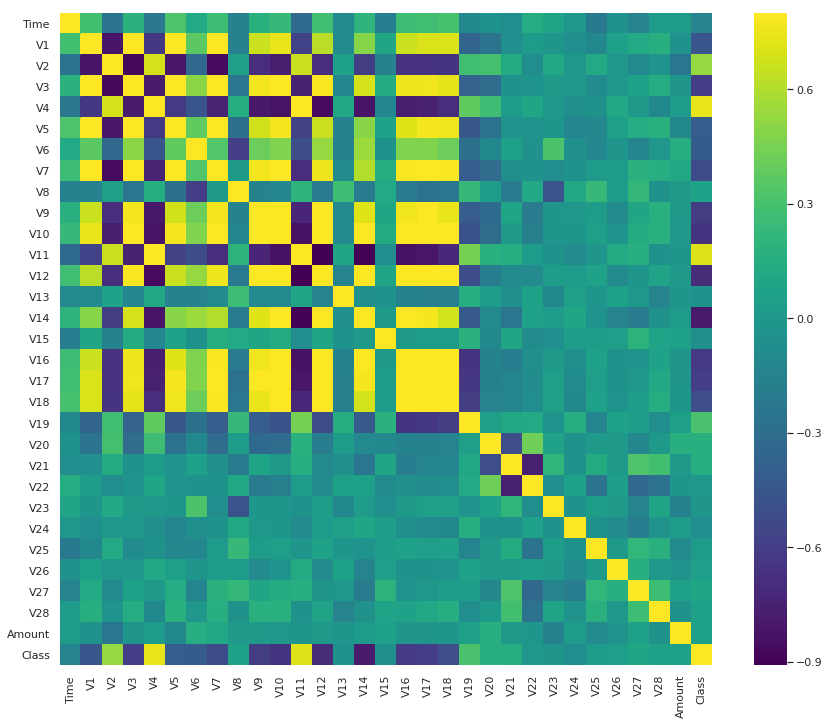

In [22]:
up_df = pd.read_pickle('../../Data/dedicatedTrain.pkl')
# Make the correlation matrix.
corrmat = up_df.corr()

f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corrmat, vmax=.8, square=True, cmap='viridis')
plt.show()

In [23]:
# Create correlation matrix
corr_matrix = up_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [24]:
# Column to drop
to_drop

['V17']

In [25]:
# Drop features 
df1 = up_df.drop(to_drop, axis=1)
test_df = test_df.drop(to_drop, axis=1)


In [26]:
# Create a test set
X_train, y_train = df1.drop('Class',1), df1['Class']
X_test, y_test = test_df.drop('Class',1), test_df['Class']


# Check it on an XGBClassifier
xg_cls = xgb.XGBClassifier(tree_method='gpu_exact', random_state=3)
xg_cls.fit(X_train,y_train)

preds = xg_cls.predict(X_test)

train_preds = xg_cls.predict(X_train)

In [28]:
# Accuracy tables on the training and test set

table_train = pd.crosstab(y_train, train_preds, margins=True)
table_test = pd.crosstab(y_test, preds, margins=True)
test_score = xg_cls.score(X_test, y_test) 
train_score = xg_cls.score(X_train, y_train) 

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '***********************************\n'
    '********** V17 Excluded ***********\n'
    '***********************************\n\n'    
    'Training set accuracy:\n'
    'Percent Type I errors:  {:.8f}\n'
    'Percent Type II errors: {:.8f}\n'
    'Score: {:.8f}\n\n'
    
    'Test set accuracy:\n'
    'Percent Type I errors: {:.8f}\n'
    'Percent Type II errors: {:.8f}\n'
    'Score: {:.8f}\n\n'
    '***********************************\n'
    '* Type I errors are normal purchases that have been flagged.\n'
    '* Type II errors are frauds that are not caught!\n'
).format(train_tI_errors, train_tII_errors, train_score, test_tI_errors, test_tII_errors, test_score))

***********************************
********** V17 Excluded ***********
***********************************

Training set accuracy:
Percent Type I errors:  0.00337272
Percent Type II errors: 0.00601530
Score: 0.99061198

Test set accuracy:
Percent Type I errors: 0.00813008
Percent Type II errors: 0.05284553
Score: 0.93902439

***********************************
* Type I errors are normal purchases that have been flagged.
* Type II errors are frauds that are not caught!



# Features Selection

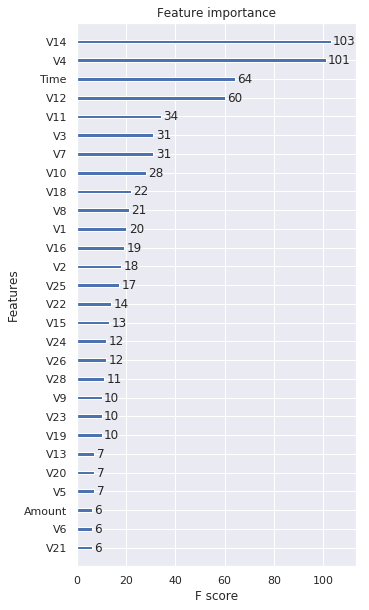

In [49]:
# Look at feature importance
plt.rcParams['figure.figsize'] = [5, 10]
xgb.plot_importance(xg_cls)
plt.show()

In [50]:
from sklearn import feature_selection
from sklearn.metrics import accuracy_score

listo = []

# Run the model with a different amount of features
# Start by the ones with most importance
thresholds = np.sort(xg_cls.feature_importances_)[::-1]
for thresh in thresholds:
    # select features using threshold
    selection = feature_selection.SelectFromModel(xg_cls, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = xgb.XGBClassifier(tree_method='gpu_exact', random_state=3)
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test)
    preds = selection_model.predict(select_X_test)
    test_score = xg_cls.score(X_test, y_test)
    
    table_test = pd.crosstab(y_test, preds, margins=True)
    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
 
    accuracy = accuracy_score(y_test, preds)
    # Save to list so we can graph it
    listo.append([thresh, select_X_train.shape[1], test_tI_errors, test_tII_errors, accuracy*100.0, test_score])
    
    print("Thresh=%.3f, n=%d, Type I=%.8f, Type II=%.8f, Accuracy: %.4f%%" % (thresh, select_X_train.shape[1], test_tI_errors, test_tII_errors, accuracy*100.0))

Thresh=0.147, n=1, Type I=0.00813008, Type II=0.04878049, Accuracy: 94.3089%
Thresh=0.144, n=2, Type I=0.01626016, Type II=0.04878049, Accuracy: 93.4959%
Thresh=0.091, n=3, Type I=0.01219512, Type II=0.05284553, Accuracy: 93.4959%
Thresh=0.086, n=4, Type I=0.01219512, Type II=0.06097561, Accuracy: 92.6829%
Thresh=0.049, n=5, Type I=0.01219512, Type II=0.05691057, Accuracy: 93.0894%
Thresh=0.044, n=7, Type I=0.00813008, Type II=0.05691057, Accuracy: 93.4959%
Thresh=0.044, n=7, Type I=0.00813008, Type II=0.05691057, Accuracy: 93.4959%
Thresh=0.040, n=8, Type I=0.00813008, Type II=0.05284553, Accuracy: 93.9024%
Thresh=0.031, n=9, Type I=0.00813008, Type II=0.05284553, Accuracy: 93.9024%
Thresh=0.030, n=10, Type I=0.00813008, Type II=0.05691057, Accuracy: 93.4959%
Thresh=0.029, n=11, Type I=0.00813008, Type II=0.06097561, Accuracy: 93.0894%
Thresh=0.027, n=12, Type I=0.01219512, Type II=0.05691057, Accuracy: 93.0894%
Thresh=0.026, n=13, Type I=0.00813008, Type II=0.05284553, Accuracy: 93.9

In [51]:
# Put data into dataframe
dffeat = pd.DataFrame(listo, columns=['Thresh', 'N_Features', 'Type_I', 'Type_II', 'Accuracy', 'Score'])

In [52]:
# Find low type II errors
low_point = dffeat[dffeat['Type_II']==dffeat.Type_II.min()]

In [53]:
low_point

,Thresh,N_Features,Type_I,Type_II,Accuracy,Score
0,0.147143,1,0.00813,0.04878,94.308943,0.939024
1,0.144286,2,0.01626,0.04878,93.495935,0.939024


In [54]:
# Note, sometimes it jumps up by 2 features because they have the same importance
dffeat

,Thresh,N_Features,Type_I,Type_II,Accuracy,Score
0,0.147143,1,0.008130,0.048780,94.308943,0.939024
1,0.144286,2,0.016260,0.048780,93.495935,0.939024
2,0.091429,3,0.012195,0.052846,93.495935,0.939024
3,0.085714,4,0.012195,0.060976,92.682927,0.939024
4,0.048571,5,0.012195,0.056911,93.089431,0.939024
5,0.044286,7,0.008130,0.056911,93.495935,0.939024
6,0.044286,7,0.008130,0.056911,93.495935,0.939024
7,0.040000,8,0.008130,0.052846,93.902439,0.939024
8,0.031429,9,0.008130,0.052846,93.902439,0.939024
9,0.030000,10,0.008130,0.056911,93.495935,0.939024


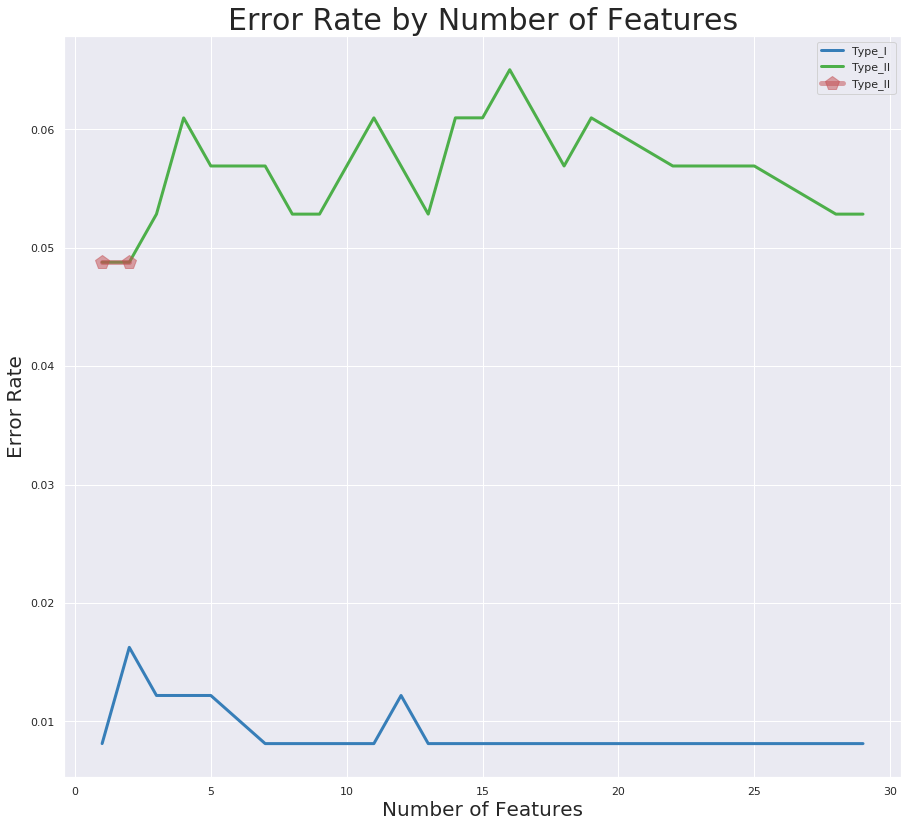

Low point for Type II 

   N_Features   Type_I  Type_II   Accuracy     Score
0           1  0.00813  0.04878  94.308943  0.939024
1           2  0.01626  0.04878  93.495935  0.939024


In [55]:
palette = plt.get_cmap('Set1')
plt.subplots(figsize=(15, 30))
plt.subplot(2,1,1)
plt.title('Error Rate by Number of Features', fontsize=30)
plt.plot( 'N_Features', 'Type_I', data=dffeat, marker='',linewidth=3, color=palette(1))
plt.plot( 'N_Features', 'Type_II', data=dffeat, marker='', linewidth=3, color=palette(2))
plt.plot( 'N_Features', 'Type_II', data=low_point,MarkerSize=15, marker='p',linewidth=5, color='r', alpha=.5)
plt.xlabel('Number of Features',fontsize=20, fontweight=0)
plt.ylabel('Error Rate',fontsize=20, fontweight=0)
plt.legend()

plt.show()

print('Low point for Type II \n\n' + str(low_point.drop('Thresh',1)))

In [30]:
dffeat.sort_values('Type_II').head(10)

,Thresh,N_Features,Type_I,Type_II,Accuracy,Score
2,0.098571,3,0.012195,0.060976,92.682927,0.910569
4,0.052857,5,0.012195,0.069106,91.869919,0.910569
5,0.045714,6,0.012195,0.069106,91.869919,0.910569
3,0.058571,4,0.012195,0.073171,91.463415,0.910569
14,0.027143,15,0.004065,0.077236,91.869919,0.910569
21,0.015714,22,0.004065,0.077236,91.869919,0.910569
20,0.015714,22,0.004065,0.077236,91.869919,0.910569
19,0.018571,20,0.004065,0.077236,91.869919,0.910569
18,0.018571,20,0.004065,0.077236,91.869919,0.910569
17,0.018571,20,0.004065,0.077236,91.869919,0.910569


In [31]:
# Find the cutoff point
if len(low_point.N_Features.values) >= 1:
    num = round(len(low_point.N_Features.values)/2)
else:
    num = 0

In [56]:
# Create a list of feature importance and their names
listoff=[]
for feature in zip(list(df1), xg_cls.feature_importances_):
    listoff.append(feature)
    print(feature)

('Time', 0.09142857)
('V1', 0.028571429)
('V2', 0.025714286)
('V3', 0.044285715)
('V4', 0.14428571)
('V5', 0.01)
('V6', 0.008571428)
('V7', 0.044285715)
('V8', 0.03)
('V9', 0.014285714)
('V10', 0.04)
('V11', 0.04857143)
('V12', 0.08571429)
('V13', 0.01)
('V14', 0.14714286)
('V15', 0.018571429)
('V16', 0.027142856)
('V18', 0.03142857)
('V19', 0.014285714)
('V20', 0.01)
('V21', 0.008571428)
('V22', 0.02)
('V23', 0.014285714)
('V24', 0.017142856)
('V25', 0.024285715)
('V26', 0.017142856)
('V27', 0.0)
('V28', 0.015714286)
('Amount', 0.008571428)


In [58]:
# Sort the list and remove all but the top 19 features

listoff.sort(key=lambda tup: tup[1])
features_drop = []
for elem in listoff[:-26]:
    features_drop.append(elem[0])
    
# Append V17 which we dropped earlier
features_drop.append('V17')

In [59]:
features_drop

['V27', 'V6', 'V21', 'V17']

In [60]:
# get up sampled df
dfold = pd.read_pickle(('../../Data/dedicatedTrain.pkl'))
dfoldtest = pd.read_pickle(('../../Data/dedicatedTest.pkl'))

In [61]:
# drop the features we don't want
dfnew = dfold.drop(features_drop,1)
dfnew1 = dfoldtest.drop(features_drop,1)

In [62]:
# Save it so we have something to use in the future
dfnew.to_pickle(('../../Data/dedicatedTrainSelect.pkl'))
dfnew1.to_pickle(('../../Data/dedicatedTestSelect.pkl'))

# Parameter Tuning

In [63]:
import pandas as pd
import numpy as np

# Open up the data with selected features
train_df = pd.read_pickle(('../../Data/dedicatedTrainSelect.pkl'))
test_df = pd.read_pickle(('../../Data/dedicatedTestSelect.pkl'))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568384 entries, 0 to 568383
Data columns (total 27 columns):
Time      568384 non-null float64
V1        568384 non-null float64
V2        568384 non-null float64
V3        568384 non-null float64
V4        568384 non-null float64
V5        568384 non-null float64
V7        568384 non-null float64
V8        568384 non-null float64
V9        568384 non-null float64
V10       568384 non-null float64
V11       568384 non-null float64
V12       568384 non-null float64
V13       568384 non-null float64
V14       568384 non-null float64
V15       568384 non-null float64
V16       568384 non-null float64
V18       568384 non-null float64
V19       568384 non-null float64
V20       568384 non-null float64
V22       568384 non-null float64
V23       568384 non-null float64
V24       568384 non-null float64
V25       568384 non-null float64
V26       568384 non-null float64
V28       568384 non-null float64
Amount    568384 non-null float64
Class

In [64]:
# Get train and test data
X_train, y_train = train_df.drop('Class',1), train_df['Class']
X_test, y_test = test_df.drop('Class',1), test_df['Class']

In [65]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

max_depth = [3, 5, 10, 15, 20]
n_estimators = [10, 30, 50, 100, 150, 200, 250]
listy =[]

# Go through multiple depths and n_estimators to find best parameters

for max_d in max_depth:
    for n_est in n_estimators:
        
        # train model
        model = xgb.XGBClassifier(n_estimators=n_est, max_depth=max_d, tree_method='gpu_exact', random_state=3)
        model.fit(X_train, y_train)

        # eval model
        preds = model.predict(X_test)
        table_test = pd.crosstab(y_test, preds, margins=True)
        test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
        test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
        accuracy = accuracy_score(y_test, preds)
        test_score = model.score(X_test, y_test)

        # Save to list so we can graph it
        listy.append([max_d, n_est, test_tI_errors, test_tII_errors, accuracy*100.0,test_score])
        print("max_depth=%.3f, n_estimators=%d, Type I=%.10f, Type II=%.10f, Accuracy: %.4f%%" % (max_d, n_est, test_tI_errors, test_tII_errors, accuracy*100.0))

max_depth=3.000, n_estimators=10, Type I=0.0081300813, Type II=0.0487804878, Accuracy: 94.3089%
max_depth=3.000, n_estimators=30, Type I=0.0081300813, Type II=0.0487804878, Accuracy: 94.3089%
max_depth=3.000, n_estimators=50, Type I=0.0081300813, Type II=0.0487804878, Accuracy: 94.3089%
max_depth=3.000, n_estimators=100, Type I=0.0081300813, Type II=0.0609756098, Accuracy: 93.0894%
max_depth=3.000, n_estimators=150, Type I=0.0000000000, Type II=0.0609756098, Accuracy: 93.9024%
max_depth=3.000, n_estimators=200, Type I=0.0000000000, Type II=0.0609756098, Accuracy: 93.9024%
max_depth=3.000, n_estimators=250, Type I=0.0000000000, Type II=0.0609756098, Accuracy: 93.9024%
max_depth=5.000, n_estimators=10, Type I=0.0081300813, Type II=0.0569105691, Accuracy: 93.4959%
max_depth=5.000, n_estimators=30, Type I=0.0081300813, Type II=0.0569105691, Accuracy: 93.4959%
max_depth=5.000, n_estimators=50, Type I=0.0040650407, Type II=0.0609756098, Accuracy: 93.4959%
max_depth=5.000, n_estimators=100, T

In [48]:
listy

[[3,
  10,
  0.008130081300813009,
  0.08536585365853659,
  90.65040650406505,
  0.9065040650406504],
 [3,
  30,
  0.008130081300813009,
  0.07723577235772358,
  91.46341463414635,
  0.9146341463414634],
 [3,
  50,
  0.0040650406504065045,
  0.07723577235772358,
  91.869918699187,
  0.9186991869918699],
 [3,
  100,
  0.008130081300813009,
  0.08130081300813008,
  91.05691056910568,
  0.9105691056910569],
 [3,
  150,
  0.0040650406504065045,
  0.08130081300813008,
  91.46341463414635,
  0.9146341463414634],
 [3,
  200,
  0.0040650406504065045,
  0.08536585365853659,
  91.05691056910568,
  0.9105691056910569],
 [3,
  250,
  0.0040650406504065045,
  0.08536585365853659,
  91.05691056910568,
  0.9105691056910569],
 [5,
  10,
  0.008130081300813009,
  0.08536585365853659,
  90.65040650406505,
  0.9065040650406504],
 [5,
  30,
  0.0040650406504065045,
  0.07723577235772358,
  91.869918699187,
  0.9186991869918699],
 [5,
  50,
  0.0040650406504065045,
  0.07317073170731707,
  92.2764227642276

In [66]:
dfest = pd.DataFrame(listy, columns=['Max_Depth', 'N_Estimators', 'Type_I', 'Type_II', 'Accuracy', 'Score'])

In [67]:
dfest.sort_values('Type_II').head(10)

,Max_Depth,N_Estimators,Type_I,Type_II,Accuracy,Score
0,3,10,0.008130,0.048780,94.308943,0.943089
1,3,30,0.008130,0.048780,94.308943,0.943089
2,3,50,0.008130,0.048780,94.308943,0.943089
7,5,10,0.008130,0.056911,93.495935,0.934959
8,5,30,0.008130,0.056911,93.495935,0.934959
3,3,100,0.008130,0.060976,93.089431,0.930894
4,3,150,0.000000,0.060976,93.902439,0.939024
5,3,200,0.000000,0.060976,93.902439,0.939024
6,3,250,0.000000,0.060976,93.902439,0.939024
9,5,50,0.004065,0.060976,93.495935,0.934959


Text(0,0.5,'Error Rate')

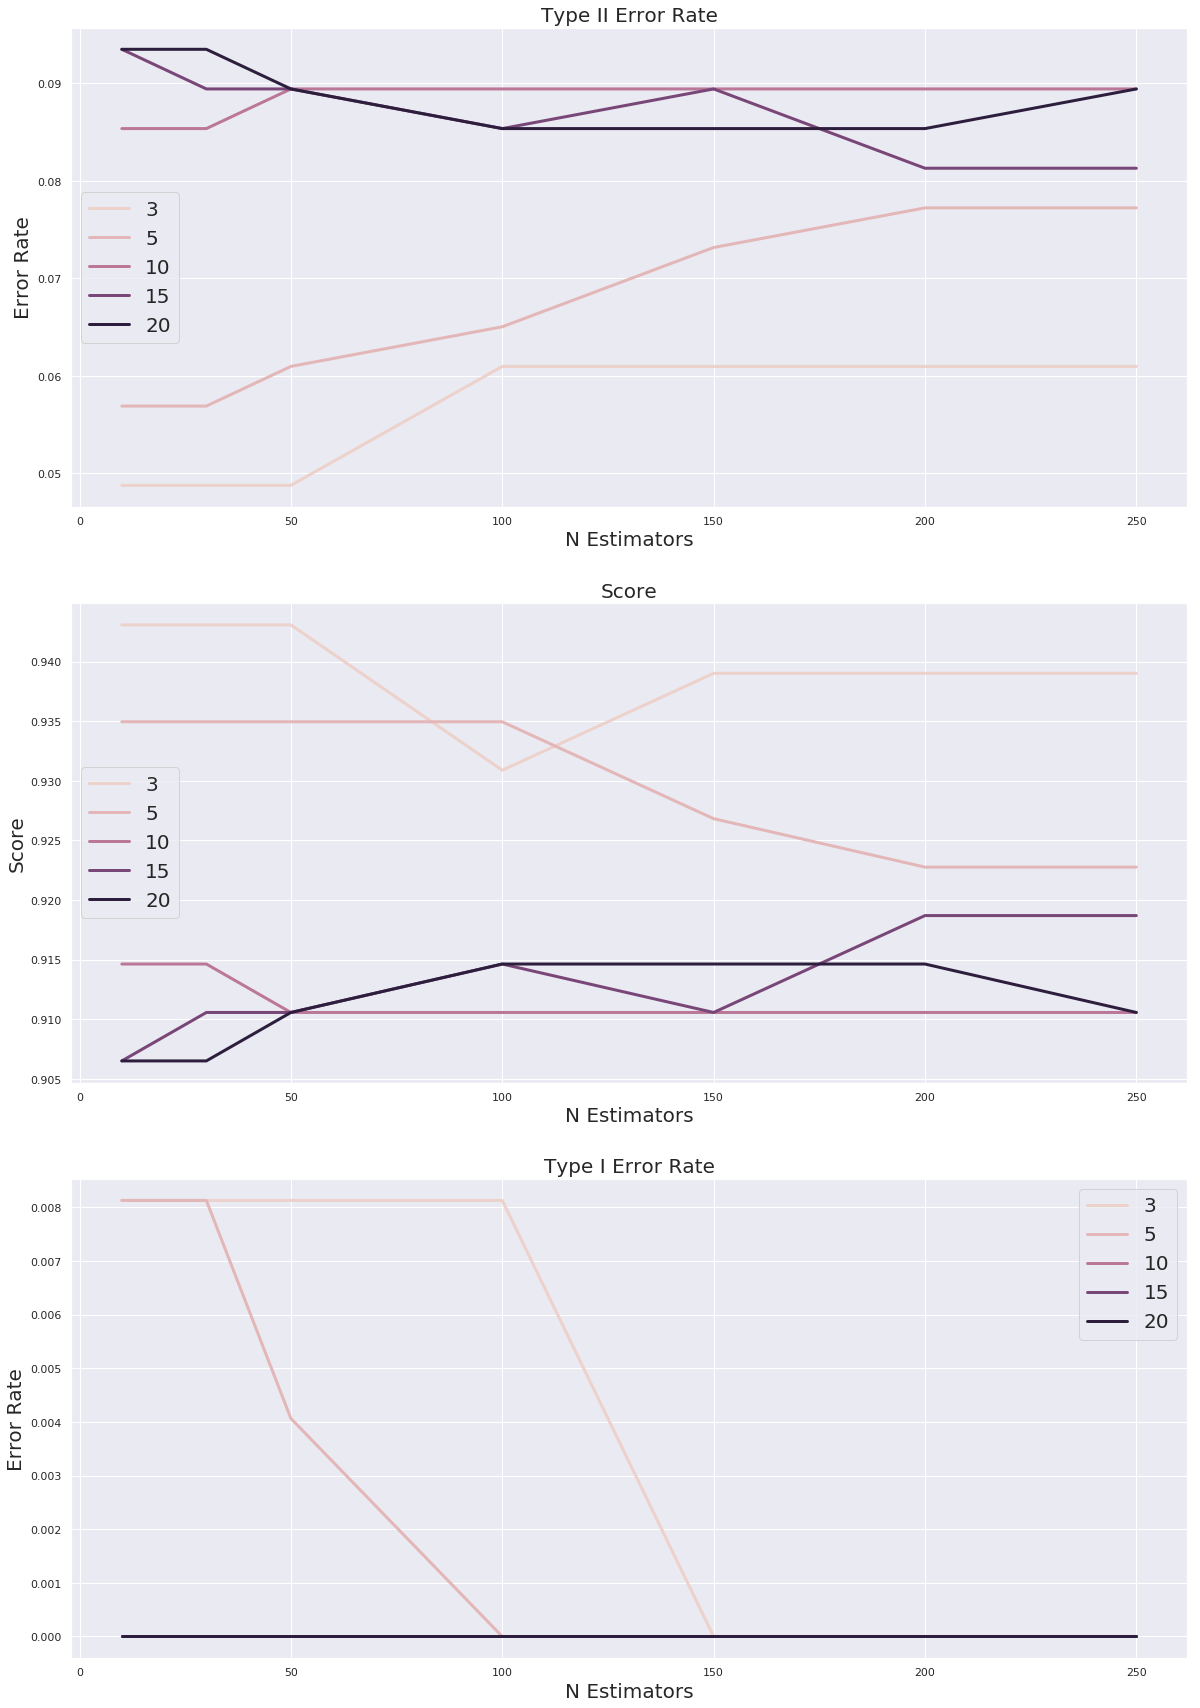

In [68]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.title('Type II Error Rate', fontsize=20)
ax = sns.lineplot(x="N_Estimators", y="Type_II", hue='Max_Depth', data=dfest, linewidth=3)
plt.legend(['3','5','10','15','20'], fontsize=20)
plt.xlabel('N Estimators',fontsize=20, fontweight=0)
plt.ylabel('Error Rate',fontsize=20, fontweight=0)

plt.subplot(3,1,2)
plt.title('Score', fontsize=20)
f = sns.lineplot(x="N_Estimators", y="Score", hue='Max_Depth', data=dfest, linewidth=3)
plt.legend(['3','5','10','15','20'], fontsize=20)
plt.xlabel('N Estimators',fontsize=20, fontweight=0)
plt.ylabel('Score',fontsize=20, fontweight=0)

plt.subplot(3,1,3)
plt.title('Type I Error Rate', fontsize=20)
ax = sns.lineplot(x="N_Estimators", y="Type_I", hue='Max_Depth', data=dfest, linewidth=3)
plt.legend(['3','5','10','15','20'], fontsize=20)
plt.xlabel('N Estimators',fontsize=20, fontweight=0)
plt.ylabel('Error Rate',fontsize=20, fontweight=0)

In [69]:
# We use the lowest max depth and N_est that gets the best value (lower = better runtime)
model = xgb.XGBClassifier(n_estimators=50, max_depth=3, tree_method='gpu_exact', random_state=3)
model.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=3,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, tree_method='gpu_exact')

In [71]:
# Try it out on original data!

dfold = pd.read_pickle(('../../Data/creditcard.pkl'))
dfold=dfold.drop(features_drop,1)

fX, fy = dfold.drop('Class',1), dfold['Class']

fulldatapreds = model.predict(dfold.drop('Class',1))
preds = model.predict(X_test)
trainpred = model.predict(X_train)

In [54]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, X_test, y_test, cv=10))

[0.84615385 0.84615385 0.92307692 0.91666667 1.         0.91666667
 0.91666667 0.91666667 0.83333333 0.875     ]


In [73]:
# Accuracy tables on the training and test set

table_full = pd.crosstab(fy, fulldatapreds, margins=True)
table_test = pd.crosstab(y_test, preds, margins=True)
table_train = pd.crosstab(y_train, trainpred, margins=True)


train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

full_tI_errors = table_full.loc[0.0,1.0] / table_full.loc['All','All']
full_tII_errors = table_full.loc[1.0,0.0] / table_full.loc['All','All']

print((
    '***********************************\n\n'    
    'Train set accuracy:\n'
    'Percent Type I errors:  {:.15f}\n'
    'Percent Type II errors: {:.15f}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors:  {:.15f}\n'
    'Percent Type II errors: {:.15f}\n\n'
    'Full set accuracy:\n'
    'Percent Type I errors:  {:.15f}\n'
    'Percent Type II errors: {:.15f}\n\n'
    '***********************************\n'
    '* Type I errors are normal purchases that have been flagged.\n'
    '* Type II errors are frauds that are not caught!\n'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, full_tI_errors, full_tII_errors))

***********************************

Train set accuracy:
Percent Type I errors:  0.006036412003153
Percent Type II errors: 0.015806215516271

Test set accuracy:
Percent Type I errors:  0.008130081300813
Percent Type II errors: 0.048780487804878

Full set accuracy:
Percent Type I errors:  0.012053776768127
Percent Type II errors: 0.000154490584852

***********************************
* Type I errors are normal purchases that have been flagged.
* Type II errors are frauds that are not caught!



In [76]:
table_train

col_0,0.0,1.0,All
Class,,,
0.0,280761,3431,284192
1.0,8984,275208,284192
All,289745,278639,568384


In [74]:
table_test

col_0,0.0,1.0,All
Class,,,
0,121,2,123
1,12,111,123
All,133,113,246


In [75]:
table_full

col_0,0.0,1.0,All
Class,,,
0,280882,3433,284315
1,44,448,492
All,280926,3881,284807


In [ ]:
probs = model.predict_proba(fX)[:,1]

In [ ]:
probs

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(fy, probs)


auc = roc_auc_score(fy, probs)
print('AUC: %.20f' % auc)

In [ ]:
from sklearn.metrics import recall_score

recall_score(fy, fulldatapreds)

In [ ]:
recall_score(y_test, preds)